In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [3]:
df = pd.read_csv('course_lead_scoring.csv')

In [4]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [5]:
df_data = df.copy()

In [6]:
df_data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [7]:
df_data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [8]:
categorical_columns = list(df_data.dtypes[df_data.dtypes=='object'].index)
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [9]:
numerical_columns = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [10]:
df_data[categorical_columns] = df_data[categorical_columns].fillna('NA')
df_data[numerical_columns] = df_data[numerical_columns].fillna(0)
df_data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

# df_train, df_temp = train_test_split(df_data, test_size=0.4, random_state=1)
# df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)
# len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [15]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:
#Question 1
for index in numerical_columns:
    score = roc_auc_score(y_train, df_train[index])
    print (f'roc_auc_score for {index} is : {score}')

roc_auc_score for number_of_courses_viewed is : 0.7635680590007088
roc_auc_score for annual_income is : 0.5519578313253012
roc_auc_score for interaction_count is : 0.738270176293409
roc_auc_score for lead_score is : 0.6144993577250176


In [18]:
# Question 2
from sklearn.feature_extraction import DictVectorizer

In [19]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [20]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
model.intercept_[0]

np.float64(-0.10464329280767921)

In [24]:
model.coef_[0].round(3)

array([-0.   , -0.027,  0.035, -0.01 ,  0.014, -0.117, -0.022,  0.033,
       -0.008, -0.023, -0.007, -0.033, -0.027, -0.018,  0.326,  0.032,
        0.   , -0.005, -0.024, -0.112,  0.07 , -0.034,  0.005, -0.012,
       -0.01 , -0.028, -0.013, -0.019, -0.023, -0.005,  0.453])

In [25]:
y_pred = model.predict_proba(X_val)[:,1]

converted_decision = (y_pred >= 0.5).astype(int)
(y_val == converted_decision).mean().round(2)

np.float64(0.7)

In [26]:
roc_auc_score(y_val, y_pred)

0.8171316268814112

In [27]:
# from sklearn.metrics import precision_score, recall_score
# print(precision_score(y_val, converted_decision))
# print(recall_score(y_val, converted_decision))

In [28]:
# Question 3: Precision and Recall

precision = []
recall = []

thresholds = np.arange(0.0, 1.01, 0.01)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    precision.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))

/tmp/ipykernel_2409/1435096941.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))


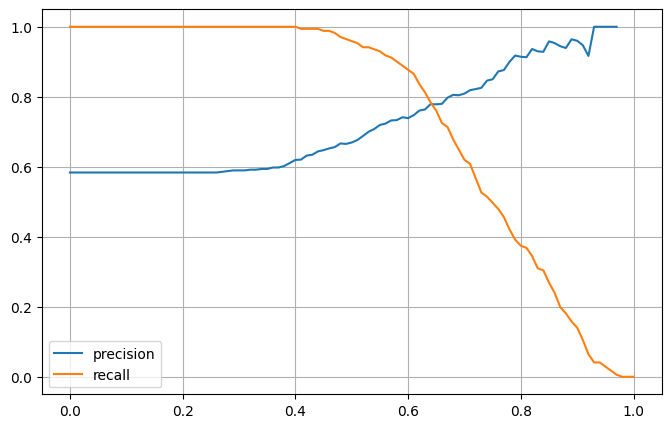

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, recall, label='recall')
plt.legend()
plt.grid(True)

In [30]:
# Question 4: F1 score
results = [] 
thresholds = np.arange(0.0, 1.01, 0.01)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    f1_score = 2*(p*r)/(p+r)
    results.append((t, f1_score))
df = pd.DataFrame(results, columns=["threshold", "f1_score"])
df = df.sort_values("f1_score", ascending=False)
df.head

/tmp/ipykernel_2409/3431586260.py:14: RuntimeWarning: invalid value encountered in scalar divide
  p = tp/(tp+fp)


<bound method NDFrame.head of      threshold  f1_score
57        0.57  0.812500
55        0.55  0.811224
56        0.56  0.809278
59        0.59  0.808511
58        0.58  0.808399
..         ...       ...
96        0.96  0.034483
97        0.97  0.011628
98        0.98       NaN
99        0.99       NaN
100       1.00       NaN

[101 rows x 2 columns]>

In [31]:
def train(df_train, y_train, C=0.1):
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    return dv, model
    

In [32]:
def predict(df, dv, model):
    dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


In [ ]:
from sklearn.model_selection import KFold
n_splits = 5
for C in (0.000001, 0.001, 1):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.converted.values
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        print(C, auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores).round(3), np.std(scores).round(3)))


In [33]:
#Question 5 and 6
from sklearn.model_selection import KFold
n_splits = 5
for C in (0.000001, 0.001, 1):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.converted.values
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        print(C, auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores).round(3), np.std(scores).round(3)))


1e-06 0.5572098563239782
1e-06 0.5191961842208147
1e-06 0.5894909688013137
1e-06 0.5582191780821917
1e-06 0.5769230769230769
C=1e-06 0.560 +- 0.024
0.001 0.8608650338718081
0.001 0.8967081085307685
0.001 0.822816482915005
0.001 0.8539850560398504
0.001 0.9000154774802662
C=0.001 0.867 +- 0.029
1 0.8060745924216483
1 0.8713738368910783
1 0.7754320118852139
1 0.8018368617683685
1 0.8558272713202291
C=1 0.822 +- 0.036
